In [104]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

from scipy.stats import rv_continuous

# Traini plots

This Jupyter notebook recreates Figs. 2 and 3 of [Traini and Blaizot](https://doi.org/10.1140/epjc/s10052-019-6826-0). The basic idea is as follows:

1. Randomly generate three pairs of numbers $(x_{c, i}, y_{c, i})$ sampled using the random distribution in Eq. (9) of the paper, but instead of using $B_q$, use $B_{qc}$:

$$ T_{qc}(x_c, y_c) = \frac1{2\pi B_{qc}} e^{-(x_c^2 + y_c^2) / (2 B_{qc})}$$

These numbers will be the 3 centers of the hotspots.

2. Now that you have three pairs of numbers $(x_{c, i}, y_{c, i})$, plot Eqs. (8)-(9) of the paper with $N_q = 3$ and now using $B_{q}$, i.e., plot

$$ T(x, y) = \frac13 \bigg(\frac1{2\pi B_{q}} e^{-[(x - x_{c, 1})^2 + (y - y_{c, 1})^2] / (2 B_{q})} + \frac1{2\pi B_{q}} e^{-[(x - x_{c, 2})^2 + (y - y_{c, 2})^2] / (2 B_{q})} + \frac1{2\pi B_{q}} e^{-[(x - x_{c, 3})^2 + (y - y_{c, 3})^2] / (2 B_{q})}\bigg) $$

Depending on the parameters $B_q$ and $B_{qc}$, you should get something similar to either Fig. 2 or Fig. 3 of the paper.

To recreate Fig. 6 of the paper, you only have to modify the distribution in step 1 to Eq. (19) of the paper:

$$ \begin{aligned}
T_{2 h o}(\mathbf{b})= & \frac{\mathscr{N}_u}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_u} e^{-\mathbf{b}^2 /\left(2 B_u\right)}+ \\
& +\frac{\mathscr{N}_d}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_d} e^{-\mathbf{b}^2 /\left(2 B_d\right)},
\end{aligned}$$

with $\mathbf{b} = (x_c, y_c)$.

If the distribution is well-known enough, for example a gaussian (or normal) distribution, then you can use `numpy` to generate the random numbers for you.

`np.random.multivariate_normal(mean, cov, N)`

The `mean` and the `cov` are the mean and the covariance matrix of the multivariate normal distribution, while `N` is the number of points you want to generate. See the [multivariate normal distribution wiki page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) to know what the covariance matrix means. Also see the [numpy multivariate normal documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) for more information.

For distributions that are not well-known, one can use techniques such as [inversion](https://en.wikipedia.org/wiki/Inverse_transform_sampling) or [rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling).

# Mantysaari model

Here we plot Figs. 2 and 3 of the paper.

In [70]:
# Defines the Gaussian function that we will be plotting later.
def gauss(x, y, mx, my, B):
    pow = - ((x - mx)**2 + (y - my)**2) / (2 * B)
    return np.exp(pow) / (3 * 2 * np.pi * B)

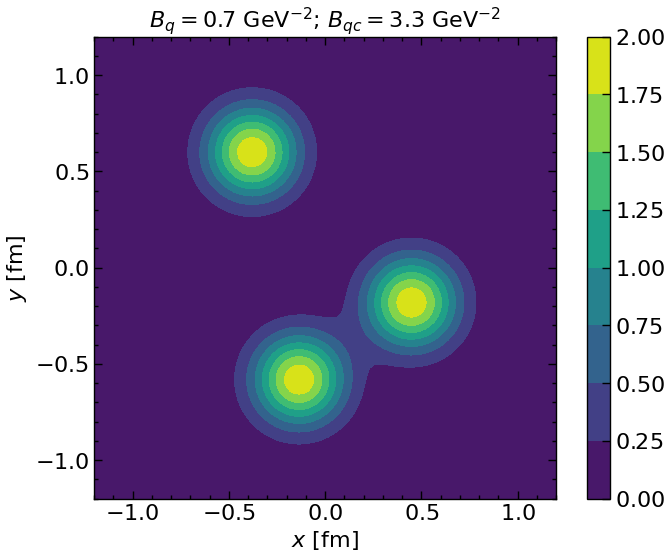

In [114]:
# Defines the parameters Bq and Bqc in units of GeV^-2 and converts them to units of fm^2
BqcGeV = 3.3
BqGeV = 0.7
Bqcfm = BqcGeV / (5.07**2)
Bqfm = BqGeV / (5.07**2)

# Generates three pairs of numbers (xc, yc) using a Gaussian distribution
mean = [0, 0]
cov = [[Bqcfm, 0], [0, Bqcfm]]
xc, yc = np.random.multivariate_normal(mean, cov, 3).T

# Generates (x, y, z) points to be plotted
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
xv, yv = np.meshgrid(x, y)
zv = gauss(xv, yv, xc[0], yc[0], Bqfm) + gauss(xv, yv, xc[1], yc[1], Bqfm) + gauss(xv, yv, xc[2], yc[2], Bqfm)

plot = plt.contourf(xv, yv, zv)
plt.colorbar(plot)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.xlabel('$x$ [fm]')
plt.ylabel('$y$ [fm]')
plt.title(r'$B_q = $' + str(BqGeV) + r' GeV$^{-2}$; $B_{qc} = $' + str(BqcGeV) + r' GeV$^{-2}$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

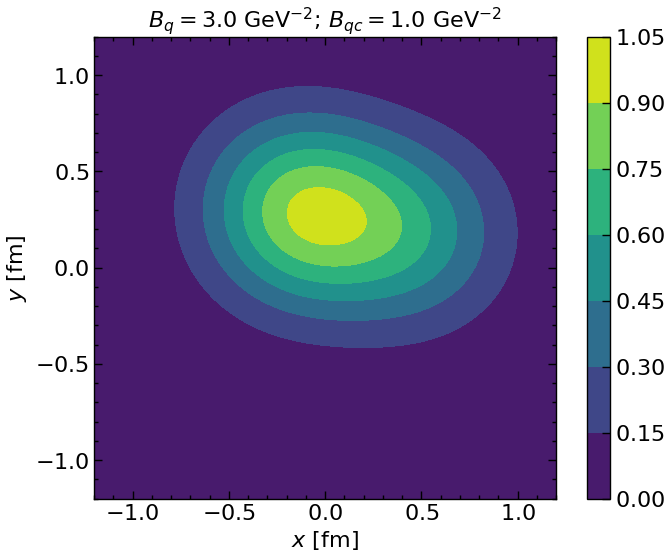

In [112]:
# Defines the parameters Bq and Bqc in units of GeV^-2 and converts them to units of fm^2
BqcGeV = 1.0
BqGeV = 3.0
Bqcfm = BqcGeV / (5.07**2)
Bqfm = BqGeV / (5.07**2)

# Generates three pairs of numbers (xc, yc) using a Gaussian distribution
mean = [0, 0]
cov = [[Bqcfm, 0], [0, Bqcfm]]
xc, yc = np.random.multivariate_normal(mean, cov, 3).T

# Generates (x, y, z) points to be plotted
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
xv, yv = np.meshgrid(x, y)
zv = gauss(xv, yv, xc[0], yc[0], Bqfm) + gauss(xv, yv, xc[1], yc[1], Bqfm) + gauss(xv, yv, xc[2], yc[2], Bqfm)

plot = plt.contourf(xv, yv, zv)
plt.colorbar(plot)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.xlabel('$x$ [fm]')
plt.ylabel('$y$ [fm]')
plt.title(r'$B_q = $' + str(BqGeV) + r' GeV$^{-2}$; $B_{qc} = $' + str(BqcGeV) + r' GeV$^{-2}$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

# Traini Blaizot (Isgur, Karl) Model

In [ ]:
class twoHOgen(rv_continuous):
    "two harmonic oscillator model"
    def _pdf(self, )